#Linear Regression

In [0]:
import random, math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rc('text.latex', preamble='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}')

# numpy - pretty matrix 
np.set_printoptions(precision=3, threshold=1000, edgeitems=5, linewidth=80, suppress=True)

import seaborn
seaborn.set(style='whitegrid'); seaborn.set_context('talk')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
# Fixed seed to make the results replicable - remove in real life!
random.seed(42)

# Regression

* We are already familiar with regression problems.
* We have a dataset $\Psi=\left\{\left<\vec{x}^{(1)},\vec{y}^{(1)}\right>,\ldots,\left<\vec{x}^{(i)},\vec{y}^{(i)}\right>,\ldots\left<\vec{x}^{(m)},\vec{y}^{(m)}\right>\right\}$ of ***noisy samples*** drawn from and ***unknown*** function $\vec{F}:\mathcal{D}\rightarrow\mathcal{I}$.
* In the regression case $\mathcal{D}\subseteq\mathbb{R}^n$ and $\mathcal{I}\subseteq\mathbb{R}^k$.

We can assume that $k=1$ and noise is Gaussian and that $\Psi$ is finite.

### Why we use the Gaussian noise assumption 

We will *assume* that the target variable is described by

$$y = \vec{F}(\vec{x},\vec{w}) + \varepsilon$$

where:
* $\vec{F}(\vec{x},\vec{w})$ is a (possibly undefined and/or unknown) function of $\vec{x}$ and $\vec{w}$ and
* $\varepsilon\sim\mathcal{N}(0,\sigma^2_\varepsilon)$ is a **Gaussian-distributed** noise component. 

#### Gaussian Noise? 

The derivations provided below all assume Gaussian noise on the target data. Is this a good assumption? In many cases yes. The argument hinges
on the use of the [Central_Limit_Theorem](http://en.wikipedia.org/wiki/Central_limit_theorem) that basically says the the **sum** of many independent random variables behaves behaves like a Gaussian distributed random variable. 

The _noise_ term in this model, $\epsilon$, can be thought of as the sum of features not included in the model function, $\vec{F}(\vec{x},\vec{w})$. Assuming these features are themselves independent random variables then the Central Limit Theorem suggests a Gaussian model is appropriate, assuming there are many independent unaccounted for features. 

It is possible that there is only a small number of unaccounted for features or that there is genuine *non-Gaussian* noise in our observation measurements, e.g. sensor shot noise that often has a Poisson distribution. In such cases, the assumption is no longer valid.

# An Example

Training dataset

In [0]:
N = 5                                              # Size of the data set
X = np.array([[0.0], [1.0], [2.0], [3.0], [4.0]])  # Inputs, shape: N x 1
y = np.array([10.5, 5.0, 3.0, 2.5, 1.0])           # Outputs, shape: N

In [5]:
X.T

array([[0., 1., 2., 3., 4.]])

In [6]:
y

array([10.5,  5. ,  3. ,  2.5,  1. ])

Test dataset

In [0]:
N_test = 100
X_test = np.linspace(0.0, 4.0, N_test).reshape((N_test, 1))
y_test = np.linspace(7.0, -5.0, N_test)+ 2*np.random.randn(N_test)

### Ploting the training and test datasets

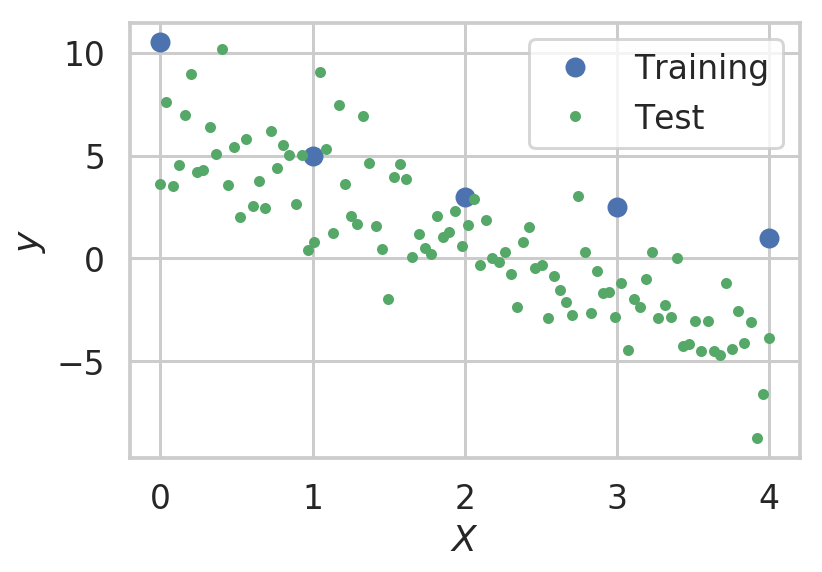

In [8]:
plt.plot(X[:, 0], y, 'bo', label='Training')
plt.plot(X_test[:, 0], y_test, "g.", label='Test')
plt.xlabel('$X$'); plt.ylabel('$y$'); plt.legend(frameon=True);

# Linear Regression Model

* We can express our constraints down with a **linear** model:

$$
y^{(i)} + \varepsilon^{(i)} =  \vec{x}^{(i)}\cdot \vec{w} + b, \forall i \in \{1,\ldots,m\}\,,
$$ 

where $\vec{w}$ and $b$ constitute a weight vector and $\varepsilon^{(n)} \sim \mathcal{N}(0, \sigma^2_\varepsilon)$.

* Weights are parameters of the linear model that can be tuned to fit the training data better.

A shorter version of this expression is the following equation:

$$\vec{y} + \vec{\epsilon} = \vec{X} \cdot \vec{w},\ \vec{X} \in \mathbb{R}^{m \times n},\ \vec{y} \in \mathbb{R}^m,\ \vec{\epsilon} \in \mathbb{R}^m,\ \vec{w} \in \mathbb{R}^n,$$

where the $i$-th **row** of $\vec{X}$ represents $\vec{x}^{(i)}$ and the $j$-th entry of the vector $\vec{y}$ represents $\vec{y}^{(j)}$.

* It might not be possible to find a weight vector that satisfies the constraints perfectly.
* Instead, we can minimize the sum of squared errors (SSE):

$$\hat{\vec{w}} = \text{arg}\,\text{min}_\vec{w} \dfrac{1}{2}\left\|\vec{X}\vec{w} - \vec{y}\right\|^2_2,$$ 

where $\left\|\vec{A}\right\|_2$ is called [Frobenius norm](http://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm) and is the generalization of the Euclidean norm for matrices.

The *frequentist* *(maximum likelihood)* approach

* assumes that we first obtain observation training data, $\vec{y}$, and that the *best*  value of $\vec{w}$, is that which maximizes the likelihood function, $p(\vec{y}|\vec{x},\vec{w})$.

Under the Gaussian noise condition it can be shown that the maximum likelihood function for the training data is
$$
\begin{align}
p(\vec{y}|\vec{X},\vec{w},\sigma^2) & = \prod_{i=1}^m {\mathcal{N}\left(y^{(i)}\left|\vec{w}^\intercal\phi(\vec{x}^{(i)}),\sigma^2\right.\right)} \\
& =\frac{m}{2}\ln\left(\frac{1}{\sigma^2}\right) -\frac{m}{2}\ln(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^m\left\{t_n -\vec{w}^\intercal\phi(\vec{x}^{(i)})\right\}^2\,,
\end{align}
$$ 
where $\vec{X}=\{\vec{x}^{(1)},\ldots,\vec{x}^{(m)}\}$ is the input value set for the corresponding $N$ observed output values contained in the vector $\mathbf{t}$, and $\mathcal{N}(\mu,\sigma^2)$ is the Normal Distribution (Gaussian).
    
Taking the logarithm of the maximum likelihood and setting the derivative with respect to $\vec{w}$ equal to zero, one can obtain the maximum likelihood parameters given by the **normal equations**:
$$\vec{w}_\text{ML} = \left(\vec{\Phi}^\intercal\vec{\Phi}\right)^{-1}\vec{\Phi}^\intercal\vec{y},$$ 
where $\vec{\Phi}$ is the $N \times M$ *design matrix* with elements $\Phi_{i,j}=\phi_j(\vec{x}^{(i)})$, and $\vec{y}$ is the $N \times K$
matrix of training set target values (for $K=1$, it is simply a column vector). 

Note that $\vec{\Phi}^\intercal$ is a $M \times N$ matrix, so that $\vec{w}_{ML}=\left(\vec{\Phi}^\intercal\vec{\Phi}\right)^{-1}\vec{\Phi}^\intercal\vec{y}$ is $(M \times N)\times(N \times M)\times(M\times N)\times(N \times K) = M \times K$, where $M$ is the number of free parameters and $K$ is the number of predicted 
target values for a given input.

Note that the only term in the likelihood function that depends on $\vec{w}$ is the last term. Thus, maximizing the likelihood function with respect to $\vec{w}$ *under the assumption of Gaussian noise* is equivalent to minimizing a 
sum-of-squares error function.

## Learning Weights

There are two ways to adjust the weights of a linear model (which includes linear models with nonlinear features):

#### Normal equations (analytical solution)

* Requires inversion of $m \times n$ matrix.
* It does not scale well with the number of features.

#### Gradient descent (iterative solution)

* Requires the calculation of $m$ gradients in each step.
* It does not scale well with the number of examples.

In addition, we can add a constraint to the objective function to penalize large weights: **Tikhonov regularization** (forward pointer).

## Normal Equations

Solving $\vec{X} \cdot \vec{w} = \vec{y}$ means solving
$$
\left\{
\begin{array}{rcrcl}
x^{(1)}_1 w_1 & + x^{(1)}_2 w_2 & + \cdots & + x^{(1)}_n w_n & = y^{(1)} \\
x^{(2)}_1 w_1 & + x^{(2)}_2 w_2 & + \cdots & + x^{(2)}_n w_n & = y^{(2)} \\
x^{(3)}_1 w_1 & + x^{(3)}_2 w_2 & + \cdots & + x^{(3)}_n w_n & = y^{(3)} \\
      \vdots  &          \vdots &   \ddots &          \vdots & = \vdots \\
x^{(m)}_1 w_1 & + x^{(m)}_2 w_2 & + \cdots & + x^{(m)}_n w_n & = y^{(m)}
\end{array}
\right.\,.
$$

* Frequently, solving equation $\vec{X} \cdot \vec{w} = \vec{y}$ directly for $\vec{w}$ by inversion is not viable.
* As $\vec{X}$ is not necessarily a square matrix, therefore $\vec{w} = \vec{X}^{-1} \vec{y}$ is usually not possible.
* This implies that it is usually impossible to find an exact solution.
* These systems are [overdetermined](https://en.wikipedia.org/wiki/Overdetermined_system).

*Note:* A system of equations is considered overdetermined if there are more equations than unknowns. An overdetermined system is almost always inconsistent (it has no solution) when constructed with random coefficients. However, an overdetermined system will have solutions in some cases, for example if some equation occurs several times in the system, or if some equations are linear combinations of the others.

### The linear [least squares](http://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29) solution

* The linear least squares is the problem of approximately solving an overdetermined system of linear equations.
* The best approximation is defined as that which minimizes the sum of squared differences between the data values and their corresponding modeled values.


That is, the solution of 

$$\vec{X}^\intercal\vec{X} \hat{\boldsymbol{w}} = \vec{X}^\intercal\vec{y}$$

for $\hat{\boldsymbol{w}}$, i.e.,

$$\hat{\vec{w}} = (\vec{X}^\intercal\vec{X})^{-1}\vec{X}^\intercal\vec{y}.$$

The expression $(\vec{X}^\intercal\vec{X})^{-1}\vec{X}^\intercal$ is equivalent to the [Moore-Penrose pseudoinverse](http://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) $\vec{X}^+$ of $\vec{X}$. It is a generalization of the inverse for non-square matrices. You can use this to implement normal equations if your library provides the function. You could also use a least squares solver (e.g. `numpy.linalg.lstsq`).

[Inversion of 2x2 matrices](https://en.wikipedia.org/wiki/Invertible_matrix#Inversion_of_2.C3.972_matrices):

$$\left(\begin{array}{cc}a & b\\ c & d\end{array}\right)^{-1} = \frac{1}{ad - bc}\left(\begin{array}{cc}d & -b\\ -c & a\end{array}\right)$$

* This approach is called linear least squares since the assumed function is linear in the parameters to be estimated. 
* Linear least squares problems are convex and have a closed-form solution that is unique, provided that the number of data points used for fitting equals or exceeds the number of unknown parameters, except in special degenerate situations. 
* In contrast, non-linear least squares problems generally must be solved by an iterative procedure, and the problems can be non-convex with multiple optima for the objective function. 
* If prior distributions are available, then even an underdetermined system can be solved using the Bayesian MMSE estimator.

See https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics) for more details.

In [0]:
def normal_equations(X, y):
    w = np.linalg.pinv(X).dot(y)
    return w

### The bias trick

Add bias to each row/instance:

In [0]:
X_bias = np.hstack((X, np.ones((N, 1))))
X_test_bias = np.hstack((X_test, np.ones((N_test, 1))))

In [11]:
X.T

array([[0., 1., 2., 3., 4.]])

In [12]:
X_bias.T

array([[0., 1., 2., 3., 4.],
       [1., 1., 1., 1., 1.]])

In [0]:
w_norm = normal_equations(X_bias, y)

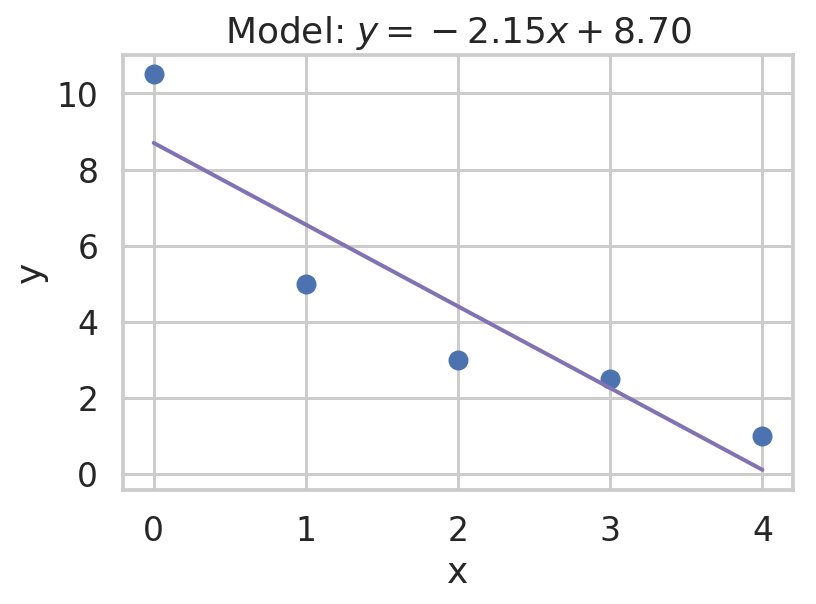

In [14]:
plt.plot(X_bias[:, 0], y, "o")
plt.plot(X_bias[:, 0], X_bias.dot(w_norm), "m-", linewidth=2)
plt.xlabel("x"); plt.ylabel("y"); plt.title("Model: $y = %.2f x + %.2f$" % tuple(w_norm));

We can now solve linear regression problems at will!

## Computational cost and complexity

Think of this problem:
* inputs: 100 color images of size 256x256 pixels
* output: radius of the ball which is at the center of the image
* Is the direct solution via normal equations viable?

## Estimating problem tractability

Assuming that each pixel is represented by three bytes defining the RGB values:

In [15]:
n_pixels = 256 * 256
memory_size_xtx = n_pixels * n_pixels * 3 * 8
print("Required memory: %d GB" % (memory_size_xtx / 2**30))

Required memory: 96 GB


Inversion is an procedure that requires $O(n^{2.373})$ operations ([Source](http://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations)).

# Gradient Descent

In cases where the training data set is very large or data is received in a stream, a direct solution using the normal equations may not be possible. An alternative approach is the **stochastic gradient descent** algorithm.

Iteratively update the weights using the gradient as reference.
<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
          <div class='well'>
              <img class='img-thumbnail' src='https://upload.wikimedia.org/wikipedia/commons/7/7a/Graph_of_sliding_derivative_line.gif'/>
          </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

$\Delta \vec{w}_t$ is minus the derivative of the error function $E(\vec{X}, \vec{y};\vec{w}_t)$ with respect to the weight $w_i$:

$$
\Delta w_i = - \alpha\frac{\partial E(\vec{X}, \vec{y};\vec{w})}{\partial w_i}\,,
$$

where:

* $\alpha$ is a hyperparameter called **learning rate**, it has to be set manually and must usually be within $\left(0, 1\right)$, typical values are $10^{-1}$, $10^{-2}$, $10^{-3}$, ...

Update $\vec{w}$ incrementally in every iteration $t$ as:

$$
\vec{w}(t+1) = \vec{w}(t) +  \Delta \vec{w}(t)\,,
$$



### Forward pointer

* Gradient descent actually is a more general rule.
* It can be applied to any minimization problem if the gradient can be computed.
* For example, artificial neural networks, support vector machines, $k$-means, etc.

## Gradient of the Linear Model

Using as error function the sum of squared errors (SSE),

$$E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w}) = \frac{1}{2}\left\|\boldsymbol{X} \cdot \boldsymbol{w} - \boldsymbol{y}\right\|^2_2\,.$$

The gradient becomes

$$\nabla \boldsymbol{w} = \nabla_{\boldsymbol{w}} E(\boldsymbol{X}, \boldsymbol{y};\boldsymbol{w}) = \boldsymbol{X}^T \cdot (\boldsymbol{X} \cdot \boldsymbol{w} - \boldsymbol{y})\,.$$

## Implementing gradient descent

In [0]:
def error(X, y, w):
    return 0.5*np.linalg.norm(X.dot(w) - y)**2

In [0]:
def linear_regression_gradient(X, y, w):
    return X.T.dot(X.dot(w)-y)

## The learning loop

Initialize weights to small random values

In [0]:
w = np.random.random(2)/10000

In [0]:
alpha = 0.05

In [20]:
for i in range(50):
    # print('Iteration', i+1, 'weights', w, 'error', error(X_bias, y, w))
    w = w - alpha*linear_regression_gradient(X_bias, y, w)
print('w_norm:', w_norm, 'w grad. desc.', w)

w_norm: [-2.15  8.7 ] w grad. desc. [-2.089  8.526]


## Visualizing gradient descent

In [0]:
def plot_contour(X_data, y_data, bounds, resolution=50, cmap=cm.viridis, 
                 alpha=0.3, linewidth=5, rstride=1, cstride=5, ax=None):
    (minx,miny),(maxx,maxy) = bounds
    
    x_range = np.linspace(minx, maxx, num=resolution)
    y_range = np.linspace(miny, maxy, num=resolution)
    X, Y = np.meshgrid(x_range, y_range)
    
    Z = np.zeros((len(x_range), len(y_range)))
    
    for i, w_i in enumerate(x_range):
        for j, w_j in enumerate(y_range):
            Z[j,i] = error(X_data, y_data, [w_i, w_j])
    
    if not ax:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        ax.set_aspect('equal')
        ax.autoscale(tight=True)
    cset = ax.contourf(X, Y, Z, 30, cmap=cmap, rstride=rstride, 
                       cstride=cstride, linewidth=linewidth, alpha=alpha)
    cset = ax.contour(X, Y, Z, 10, cmap=cmap, rstride=rstride, 
                       cstride=cstride, linewidth=linewidth)
    plt.clabel(cset, inline=1, fontsize=7)
    return Z

Implementing the gradient descent loop as a function.

In [0]:
def gradient_descent(X, y, w_0, alpha, max_iters):
    'Returns the values of the weights as learning took place.'
    w = np.array(w_0, dtype=np.float64)
    w_hist = np.zeros(shape=(max_iters+1, w.shape[0]))
    w_hist[0] = w
    for i in range(0,max_iters):
        delta_weights = -alpha*linear_regression_gradient(X_bias, y, w)
        w += delta_weights
        w_hist[i+1] = w
    return w_hist

In [0]:
w_0 = [-3,2] # we fix the initial weights to make it more illustrative
alpha = 0.05
max_iters = 25

In [0]:
w_hist = gradient_descent(X_bias, y, w_0, alpha, max_iters)

In [0]:
def plot_hist_contour(X_bias, y, w_hist, w_norm, ax=None, title=None, show_legend=False):
    if not ax:
        fig = plt.figure(figsize=(5,5))
        ax = fig.gca()
    combi=np.hstack((w_norm.reshape(2,1), w_hist.T))
    bounds = (np.min(combi, axis=1)-2, np.max(combi, axis=1)+2)
    plot_contour(X_bias, y, bounds, ax=ax)
    ax.scatter(w_norm[0], w_norm[1], c='m', marker='D', s=50, label='$w_{norm}$')
    ax.plot(w_hist[:,0], w_hist[:,1], '.:', c='b')
    ax.scatter(w_hist[0,0], w_hist[0,1], c='navy', marker='o', s=65, label='start')
    ax.scatter(w_hist[-1,0], w_hist[-1,1], c='navy', marker='s', s=50, label='end')
    plt.xlabel('$w_1$'); plt.ylabel('$w_2$'); 
    if title:
        plt.title(title)
    if show_legend:
        plt.legend(scatterpoints=1, bbox_to_anchor=(1.37,1), frameon=True);

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  s)


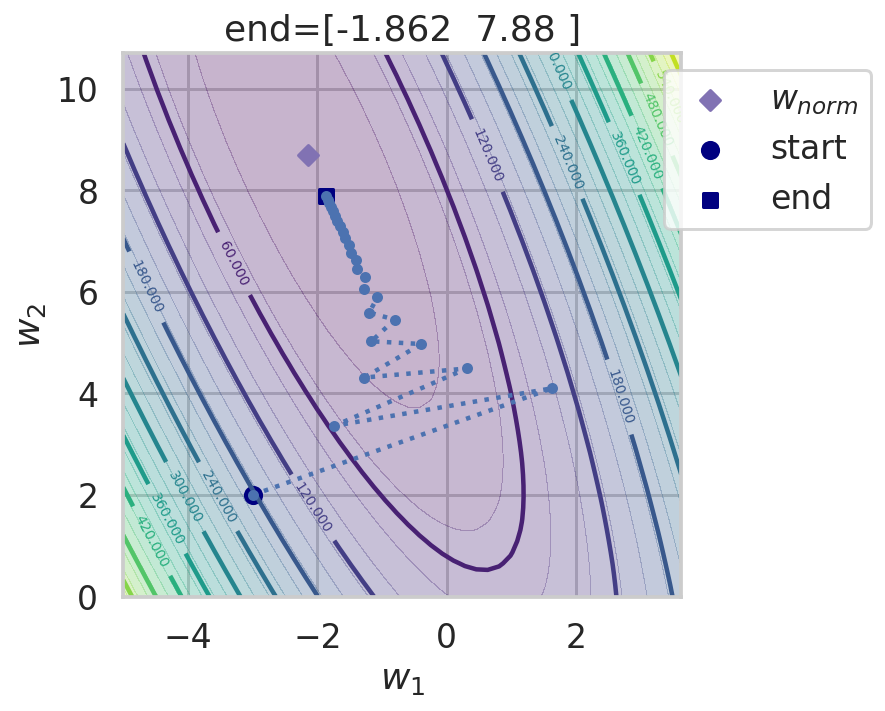

In [26]:
plot_hist_contour(X_bias, y, w_hist, w_norm, title='end='+str(w_hist[-1]), show_legend=True)

What is the impact of the learning rate ($\alpha$)?

In [0]:
def alphas_study(alphas):
    fig = plt.figure(figsize=(11,7))
    for i,alpha in enumerate(alphas):
        ax = fig.add_subplot(2,3,i+1)
        w_hist = gradient_descent(X_bias, y , w_0, alpha, max_iters)
        plot_hist_contour(X_bias, y, w_hist, w_norm, ax=ax, title='$\\alpha='+str(alpha)+'$') 
    plt.legend(scatterpoints=1, ncol=3, bbox_to_anchor=(-0.2,-0.2), frameon=True);
    plt.tight_layout()

## Impact of learning rate

In [28]:
alphas = np.linspace(0.02,0.07,6)
alphas

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07])

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


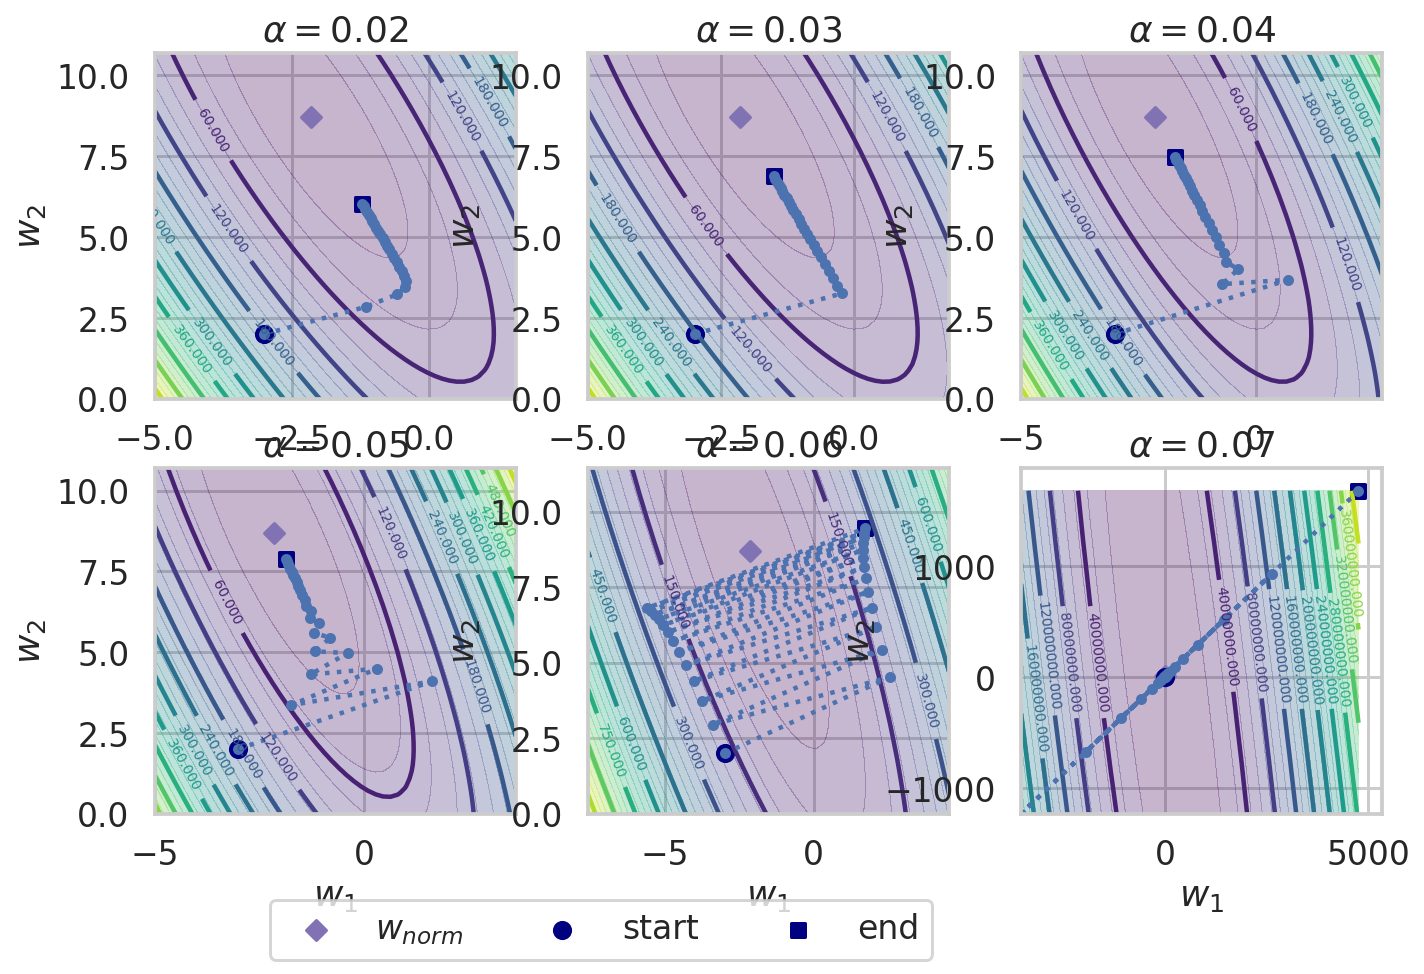

In [29]:
alphas_study(alphas)

### Improving GD by adding a *momentum* term

Idea adding some an inertial momentum to the process can:
* accelerate convergence when moving in a plateau, or
* damp oscilations.

Update $\vec{w}$ incrementally in every iteration $t$ as:

$$\vec{w}(t+1) = \vec{w}(t) + \alpha\Delta \vec{w}(t) + \beta \Delta \vec{w}(t-1),$$

where $\beta\in\mathbb{R}^+$ is known as the momentum rate.

In [0]:
def gradient_descent_with_momentum(X, y, w_0, alpha, beta, max_iters):
    w = np.array(w_0, dtype=np.float64)
    w_hist = np.zeros(shape=(max_iters+1, w.shape[0]))
    w_hist[0] = w
    omega = np.zeros_like(w)
    for i in range(max_iters): 
        delta_weights = -alpha*linear_regression_gradient(X, y, w) + beta*omega
        omega = delta_weights
        w += delta_weights
        w_hist[i+1] = w
    return w_hist

In [0]:
alpha = 0.05
beta = 0.5
max_iters = 25

In [0]:
w_hist = gradient_descent(X_bias, y, (-3,2), alpha, max_iters)
w_hist_mom = gradient_descent_with_momentum(X_bias,y, (-3,2), alpha, beta, max_iters)

In [0]:
def comparison_plot():
    fig = plt.figure(figsize=(9,4.5))
    ax = fig.add_subplot(121)
    plot_hist_contour(X_bias, y, w_hist, w_norm, ax=ax, title='Gradient descent')
    ax = fig.add_subplot(122)
    plot_hist_contour(X_bias, y, w_hist_mom, w_norm, ax=ax, title='Gradient descent with momentum', show_legend=True) 
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  s)


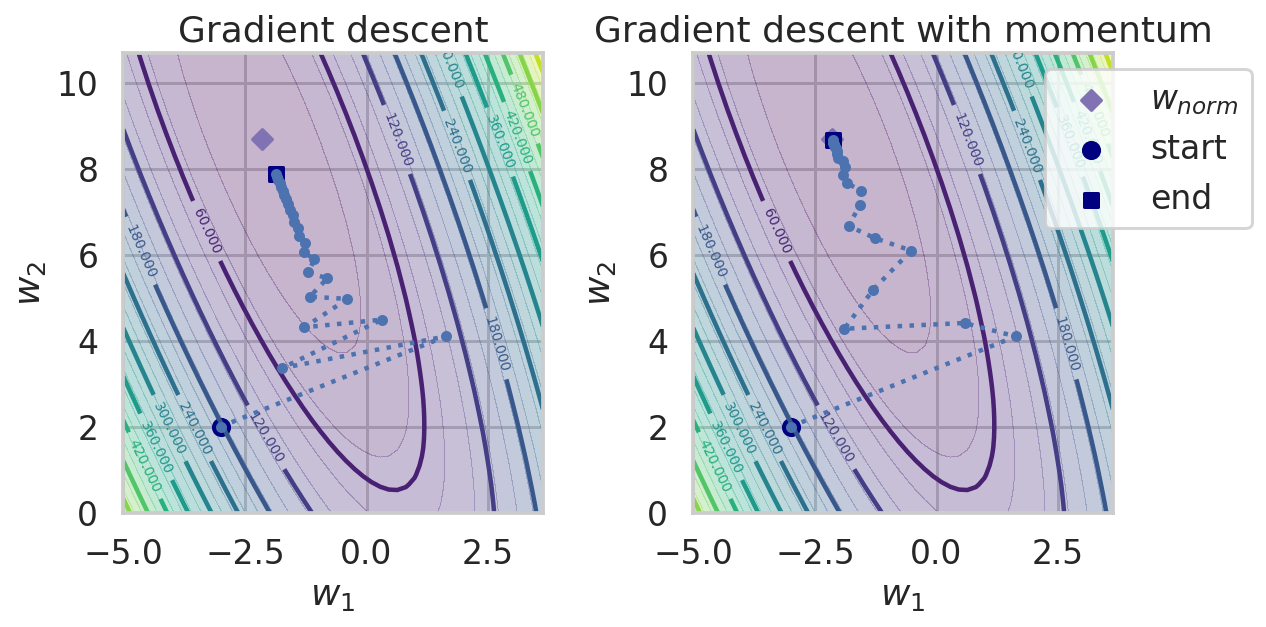

In [34]:
comparison_plot()

In [0]:
def alphas_study_with_momentum(alphas, beta):
    fig = plt.figure(figsize=(11,7))
    for i,alpha in enumerate(alphas):
        ax = fig.add_subplot(2,3,i+1)
        w_hist = gradient_descent_with_momentum(X_bias, y , w_0, alpha, beta, max_iters)
        plot_hist_contour(X_bias, y, w_hist, w_norm, ax=ax, title='$\\alpha='+str(alpha)+'$')  
    plt.legend(scatterpoints=1, ncol=3, bbox_to_anchor=(-0.2,-0.2), frameon=True);
    plt.tight_layout()

## Impact of the momentum term

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


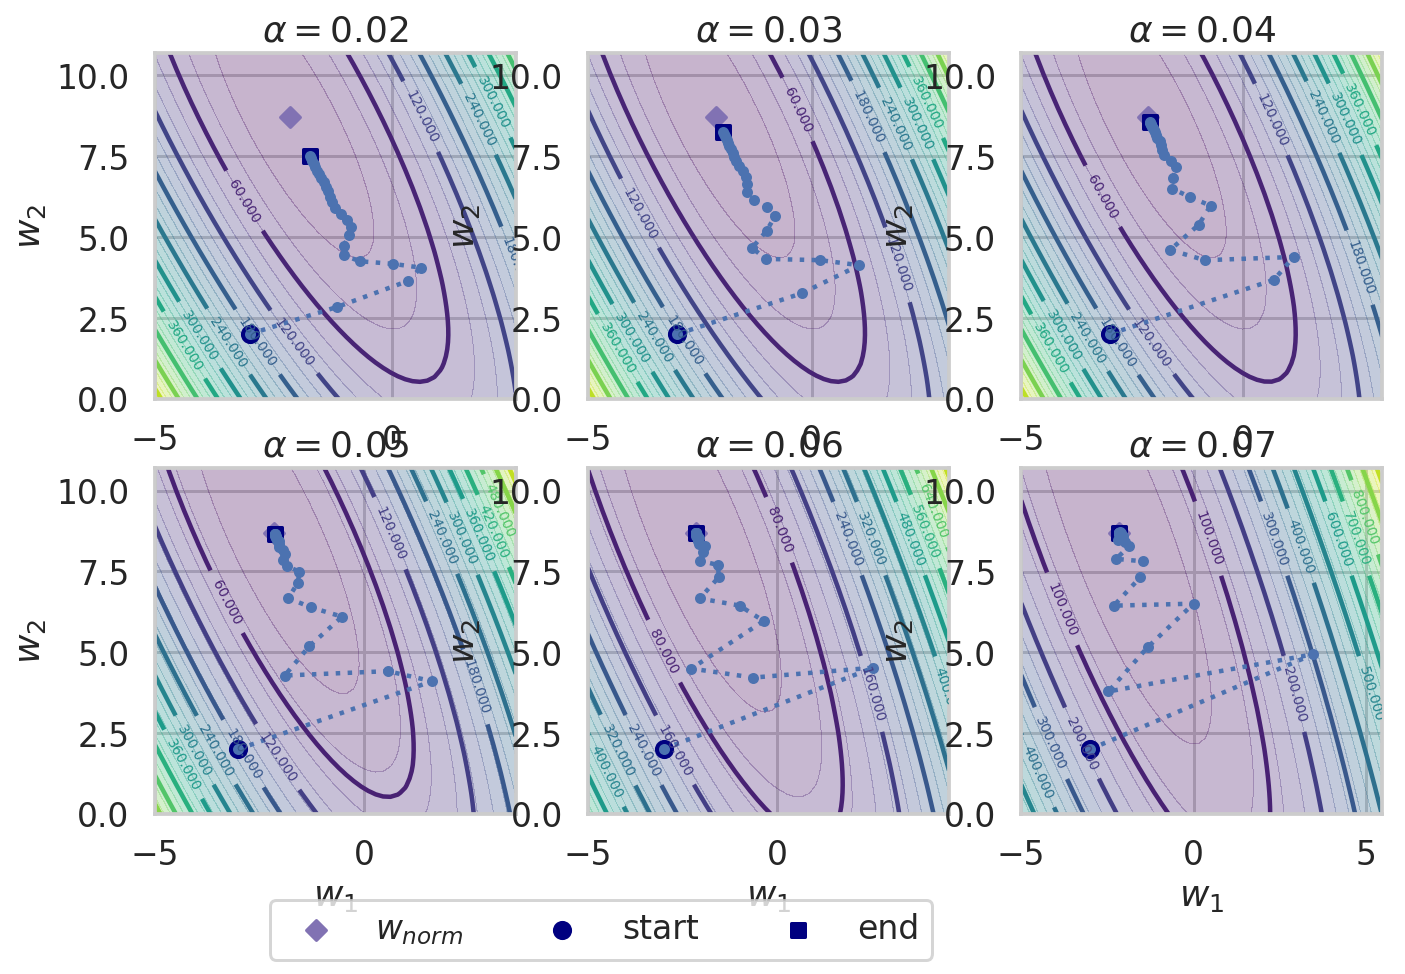

In [37]:
alphas_study_with_momentum(alphas, 0.5)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


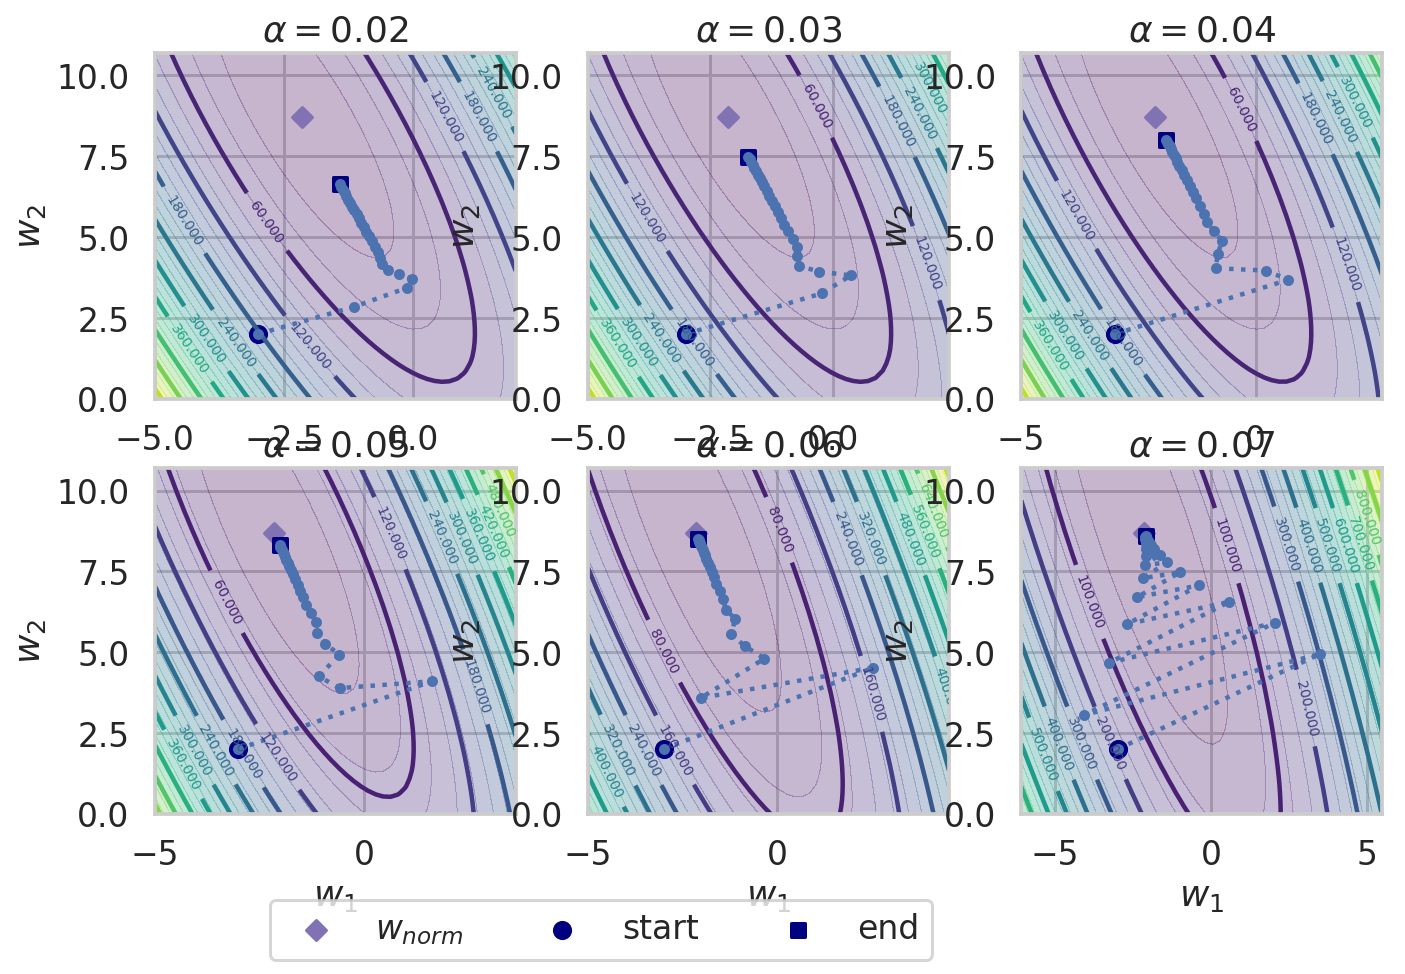

In [38]:
alphas_study_with_momentum(alphas, 0.25)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


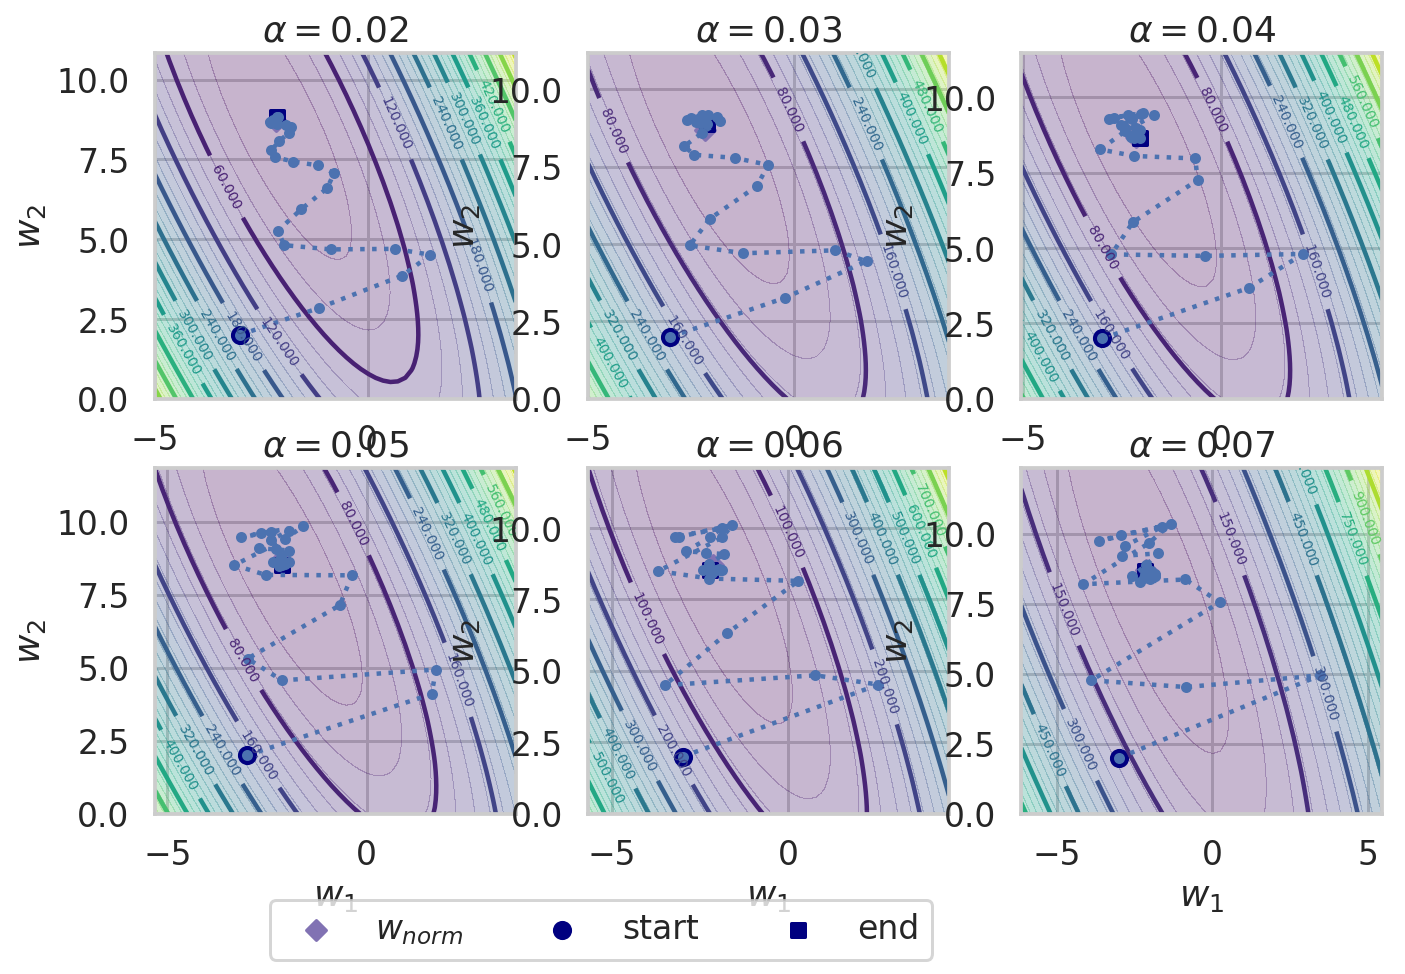

In [39]:
alphas_study_with_momentum(alphas, 0.75)

... I know you are wondering how $\beta=1$ looks like.

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'linewidth'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


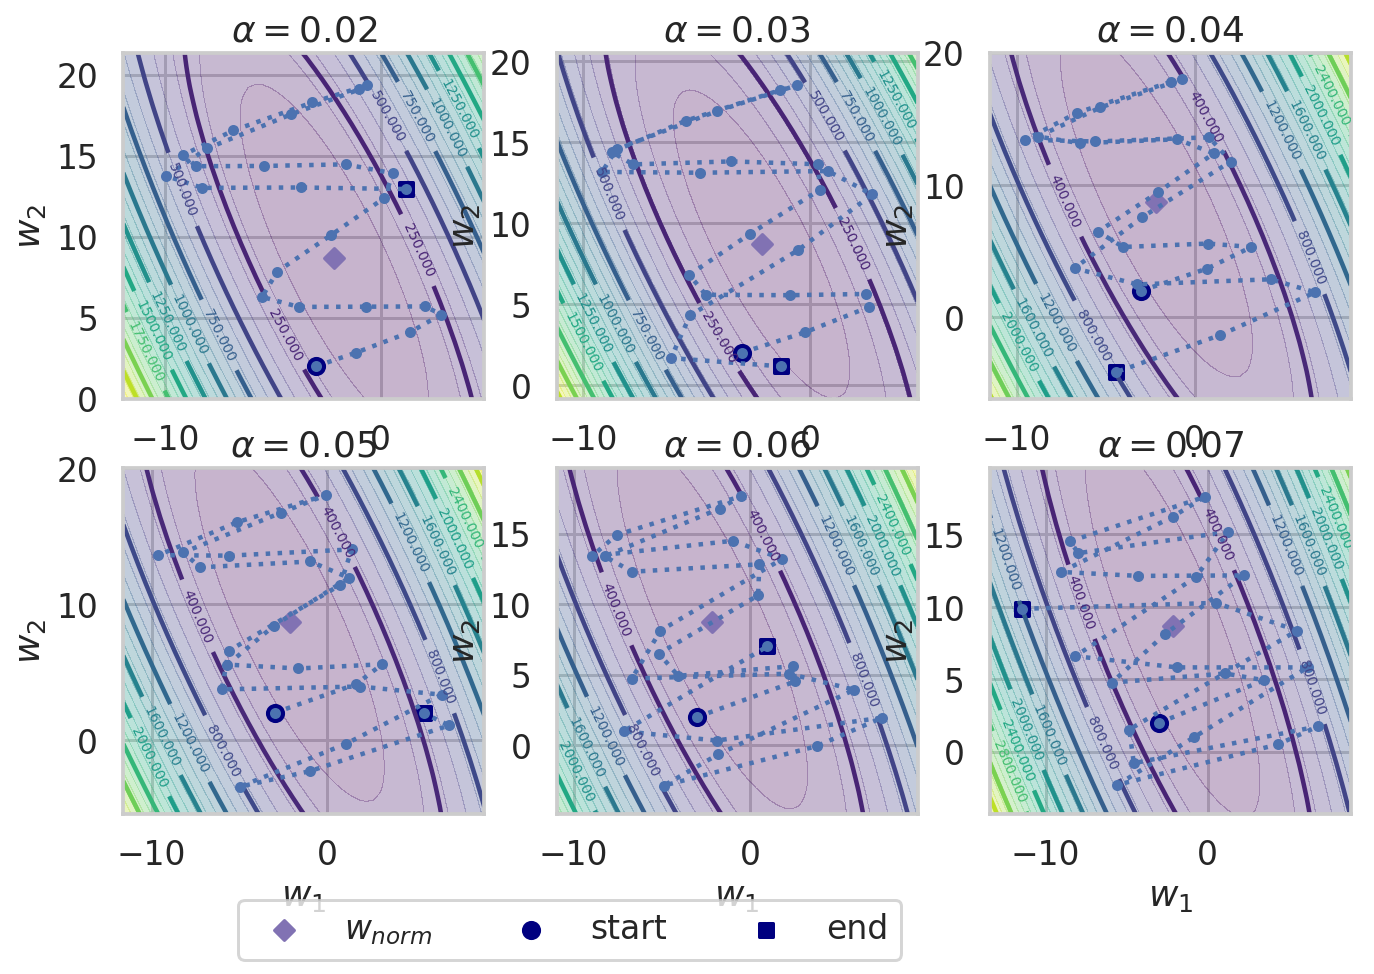

In [40]:
alphas_study_with_momentum(alphas, 1.05)

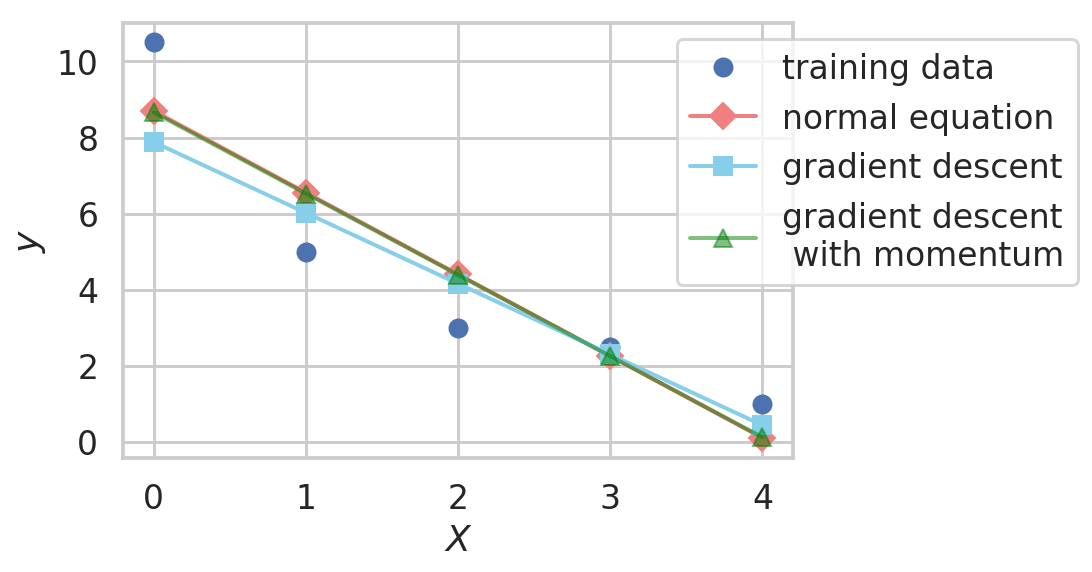

In [41]:
plt.plot(X_bias[:, 0], y, "o", label='training data')
plt.plot(X_bias[:, 0], X_bias.dot(w_norm), "D-", c='lightcoral',  
         linewidth=2, label='normal equation')
plt.plot(X_bias[:, 0], X_bias.dot(w_hist[-1]), "s-", c='skyblue', 
         linewidth=2, label='gradient descent')
plt.plot(X_bias[:, 0], X_bias.dot(w_hist_mom[-1]), "^-", c='green', 
         linewidth=2, alpha=0.5, label='gradient descent\n with momentum')
plt.xlabel("$X$"); plt.ylabel("$y$"); plt.legend(numpoints=1, bbox_to_anchor=(1.45,1), frameon=True);

## Normal equations vs gradient descent

In [0]:
N_test = 10000000
X_test_load = np.linspace(0.0, 4.0, N_test).reshape((N_test, 1))
y_test_load = np.linspace(7.0, -5.0, N_test)+ 2*np.random.randn(N_test)
X_test_load_bias = np.hstack((X_test_load, np.ones((N_test, 1))))

In [43]:
%%time 
w_norm = normal_equations(X_test_load_bias, y_test_load)

CPU times: user 655 ms, sys: 581 ms, total: 1.24 s
Wall time: 783 ms


In [44]:
%%time 
w_grad = gradient_descent_with_momentum(X_test_load_bias, y_test_load, 
                                              np.random.random(2)/1000, 0.000001, 0.25, 25)

CPU times: user 3.22 s, sys: 837 ms, total: 4.06 s
Wall time: 2.09 s


### Comparing results

In [45]:
w_norm

array([-3.,  7.])

In [46]:
w_grad[-1]

array([-6.264e+43, -2.449e+43])

In [47]:
np.linalg.norm(w_norm - w_grad[-1])

6.725281306483068e+43

# How can we make a model more general?

* **Get more training data.**
* Generate artificial training data:
    * Add noise to your training data
    * Example for object recognition: scale, rotate, distort images, select random samples from a bigger image, corrupt image, ...
* Prefer simple models (e.g. degree of polynomial)
* Penalize large weights, for example
    * quadratic values of weights
    * absolute values of weights
    * ...
* Average **different** models (ensemble methods)

# Final remarks

* We now have a tool for solving regression problems.
* ...but the world is highly non-linear 😱.
* Gradient descent is applicable in cases where the loss function is differentiable with respect to the parameters.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>